In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Возьмем формулу $f(x) = \frac{(x - 5)^4 + \sqrt{x}}{x + 1}$ и сгенерим к ней какой-нибудь шум.

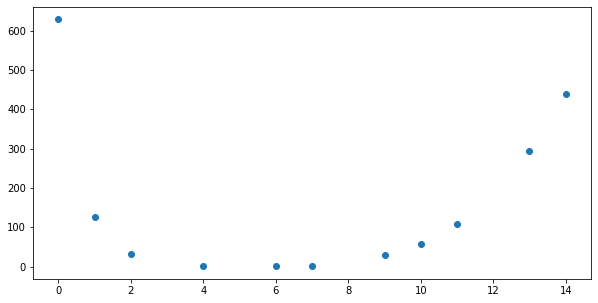

In [141]:
from numpy.random import Generator, MT19937

rnd = Generator(MT19937(3336))

x = rnd.integers(low=0, high=15, size=18)
x.sort()
x = np.unique(x)
y = np.array([((i - 5)**4 + np.sqrt(i)) / (i + 1) + rnd.uniform(-5, 5) for i in x])

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

### Cubic-spline interpolation

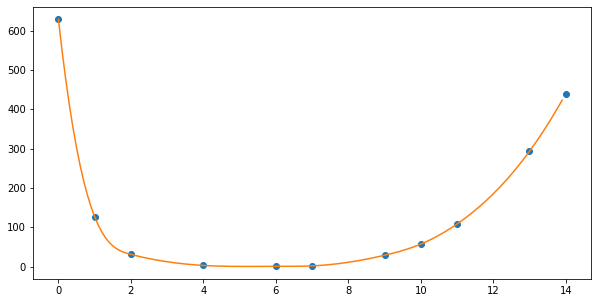

In [142]:
from scipy import interpolate

f = interpolate.CubicSpline(x, y)
x2 = np.arange(min(x), max(x), 0.1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', x2, f(x2), '-')
plt.show()

Реализация cubic-spline в scipy [здесь](https://github.com/scipy/scipy/blob/9b93d46c4fb42847bd1a3f0e832b2e653ad47fb9/scipy/interpolate/_cubic.py#L464)

Как работает кубик-сплайн [здесь](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B1%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D1%81%D0%BF%D0%BB%D0%B0%D0%B9%D0%BD)


### Lagrange interpolation

Как работает интерполяция методом Лагранжа [здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%87%D0%BB%D0%B5%D0%BD_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0)

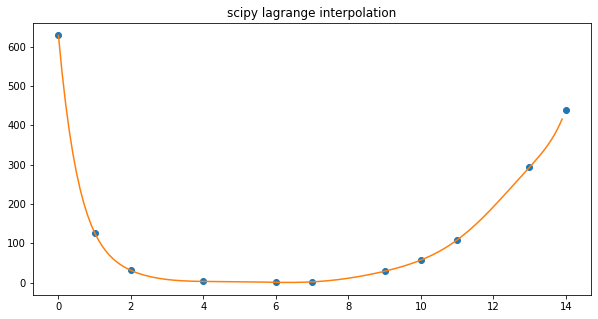

In [143]:
from scipy.interpolate import lagrange

f2 = lagrange(x, y)
y2 = f2(x2)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', x2, y2, '-')
plt.title("scipy lagrange interpolation")
plt.show()

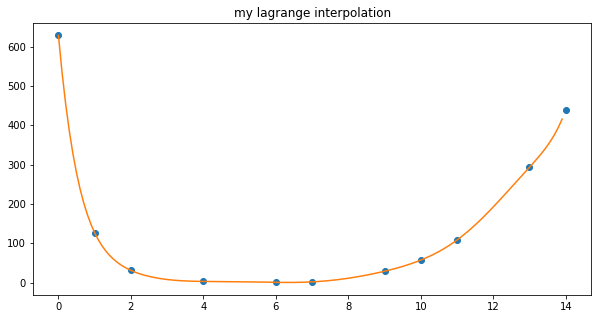

In [144]:
def lagrange2(X, Y, x):
    res = np.array([0.] * len(x))
    for k in range(len(x)):
        for i in range(len(X)):
            res[k] += Y[i] * np.prod([(x[k] - X[j]) / (X[i] - X[j]) for j in range(len(X)) if j != i])
    return res


y3 = lagrange2(x, y, x2)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', x2, y3, '-')
plt.title("my lagrange interpolation")
plt.show()

### Library vs self-written implementations comparison

In [145]:
print('error:', np.linalg.norm(y2 - y3))

error: 7.634948621165497e-08
